In [1]:
from numpy import genfromtxt
from time import time
from datetime import datetime
from sqlalchemy import Column, Integer, Float, Date
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Joined Data.csv')

In [3]:
data.head()

,frequency,indicator,location,time,value,subject,frequency-2,indicator-2,location-2,time-2,Value,subject-2
0,A,INFANTMORTALITY,AUS,2019,3.3,TOT,A,LIFEEXP,AUS,2016,80.4,MEN
1,A,INFANTMORTALITY,AUS,2018,3.1,TOT,A,LIFEEXP,AUS,2016,80.4,MEN
2,A,INFANTMORTALITY,AUS,2017,3.3,TOT,A,LIFEEXP,AUS,2016,80.4,MEN
3,A,INFANTMORTALITY,AUS,2016,3.1,TOT,A,LIFEEXP,AUS,2016,80.4,MEN
4,A,INFANTMORTALITY,AUS,2019,3.3,TOT,A,LIFEEXP,AUS,2017,80.5,MEN


In [4]:
infant_mortality = "Infant Mortality.csv"
life_expectancy_at_birth = "Life Expectancy at Birth.csv"

infant_mortality = pd.read_csv(infant_mortality)
life_expectancy_at_birth = pd.read_csv(life_expectancy_at_birth)

In [5]:
data_df = pd.merge(infant_mortality, life_expectancy_at_birth, how = "left", on="location")
data_df.head()

,frequency_x,indicator_x,location,time_x,value,subject_x,frequency_y,indicator_y,time_y,Value,subject_y
0,A,INFANTMORTALITY,AUS,2016,3.1,TOT,A,LIFEEXP,2016,80.4,MEN
1,A,INFANTMORTALITY,AUS,2016,3.1,TOT,A,LIFEEXP,2017,80.5,MEN
2,A,INFANTMORTALITY,AUS,2016,3.1,TOT,A,LIFEEXP,2018,80.7,MEN
3,A,INFANTMORTALITY,AUS,2016,3.1,TOT,A,LIFEEXP,2019,80.9,MEN
4,A,INFANTMORTALITY,AUS,2016,3.1,TOT,A,LIFEEXP,2016,82.5,TOT


In [6]:
mean = data_df.groupby('location').mean()["value"]
median = data_df.groupby('location').median()["value"]
standard_deviation = data_df.groupby('location').std()["value"]

data = {
        'Mean': mean,
        'Median': median,
        'Standard Deviation' : standard_deviation,
}

summary_table = pd.DataFrame(data)
summary_table.head()



,Mean,Median,Standard Deviation
location,,,
AUS,3.200,3.20,0.101058
AUT,2.900,2.90,0.142615
BEL,3.575,3.65,0.229683
BRA,13.250,13.00,0.837931
CAN,4.525,4.50,0.110126


In [7]:
grouped_df = pd.DataFrame(data_df.groupby(["location"]).count()).reset_index()
frequency_datapoints = grouped_df [["location", "value"]]
frequency_datapoints = frequency_datapoints.rename(columns={"value":"Count"})
frequency_datapoints = frequency_datapoints.set_index("location")

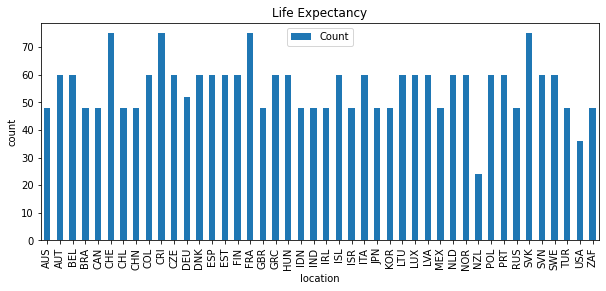

<Figure size 432x288 with 0 Axes>

In [8]:
frequency_datapoints.plot(kind="bar" , figsize=(10,4))

plt.title("Life Expectancy")
plt.ylabel("count")
plt.xlabel("location")

plt.show()
plt.tight_layout()

In [9]:
location = summary_table.index.tolist()
location

['AUS',
 'AUT',
 'BEL',
 'BRA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'COL',
 'CRI',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'GBR',
 'GRC',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'ISL',
 'ISR',
 'ITA',
 'JPN',
 'KOR',
 'LTU',
 'LUX',
 'LVA',
 'MEX',
 'NLD',
 'NOR',
 'NZL',
 'POL',
 'PRT',
 'RUS',
 'SVK',
 'SVN',
 'SWE',
 'TUR',
 'USA',
 'ZAF']

In [10]:
location_count = (data_df.groupby(["location"])["indicator_x"].count()).tolist()
location_count

[48,
 60,
 60,
 48,
 48,
 75,
 48,
 48,
 60,
 75,
 60,
 52,
 60,
 60,
 60,
 60,
 75,
 48,
 60,
 60,
 48,
 48,
 48,
 60,
 48,
 60,
 48,
 48,
 60,
 60,
 60,
 48,
 60,
 60,
 24,
 60,
 60,
 48,
 75,
 60,
 60,
 48,
 36,
 48]

In [11]:
x_axis = np.arange(len(location_count))

<BarContainer object of 44 artists>

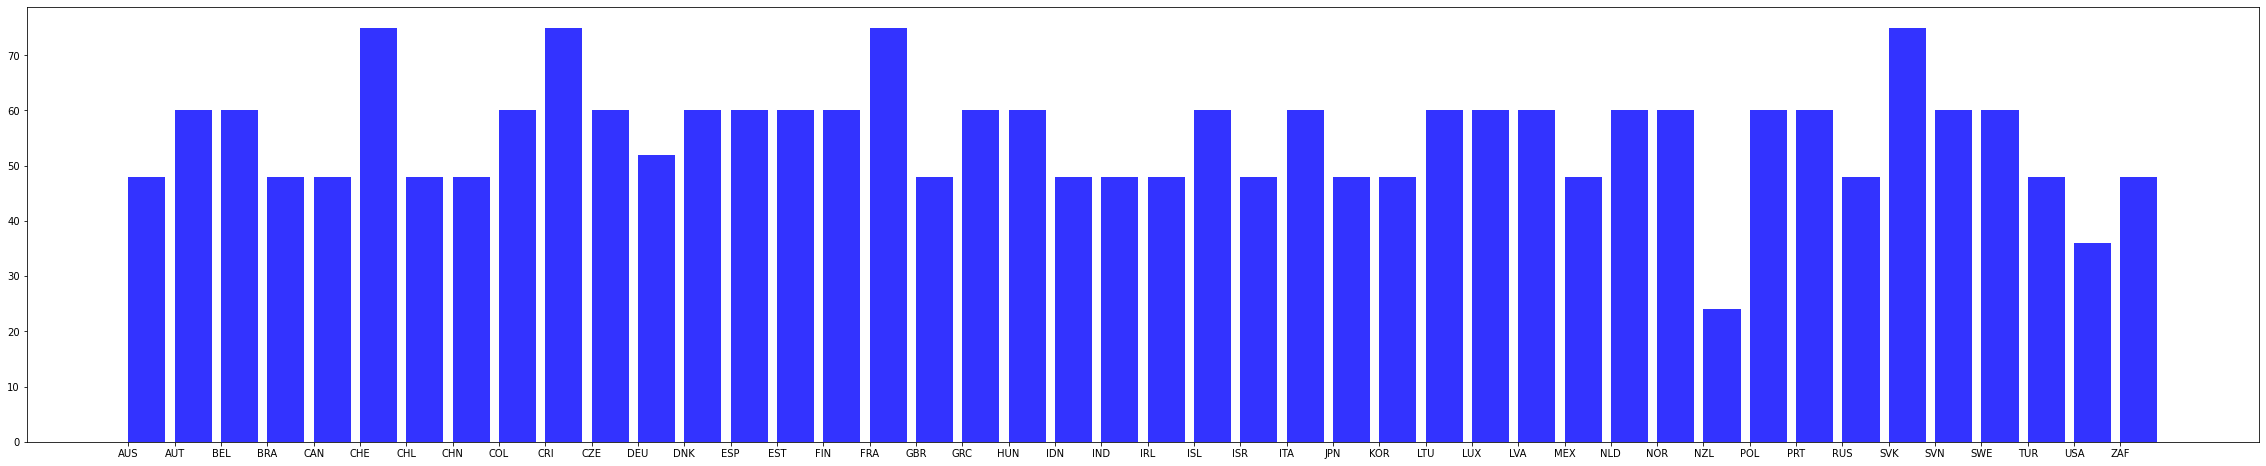

In [12]:
x_axis = location

plt.figure(figsize = (40,8))
plt.bar(x_axis, location_count, color ='b', alpha=0.8, align="edge")
#plt.tight_layout()

In [24]:
gender_df = pd.DataFrame(data_df.groupby(["subject_y"]).count()).reset_index()
gender_df.head()

,subject_y,frequency_x,indicator_x,location,time_x,value,subject_x,frequency_y,indicator_y,time_y,Value
0,MEN,812,812,812,812,812,812,812,812,812,812
1,TOT,816,816,816,816,816,816,816,816,816,816
2,WOMEN,812,812,812,812,812,812,812,812,812,812


In [25]:
gender_df = gender_df[["subject_y", "location"]]
gender_df = gender_df.rename(columns={"location":"Count"})
gender_df.head()

,subject_y,Count
0,MEN,812
1,TOT,816
2,WOMEN,812


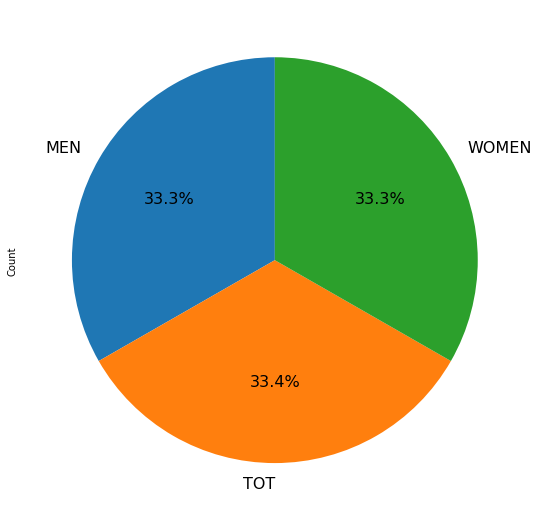

In [28]:
plt.figure(figsize=(20,16))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%',startangle=90, shadow=False, labels=gender_df['subject_y'], legend=False, fontsize=16)